# 1- introduction to K Nearest Neighbours algorithm

First, we will discuss and and expalin the knn algorithm and most important concept about the algorithm, Are you ready??

In machine learning , The Knn algorithm is One of the easiest and simplest algorithms, if not the easiest among them. KNN is supervised algorithm and non-parametric algorithm , which mean there is no assumption required for data distribution.

KNN algorithm used for classification and regression tasks , and both classification and regression tasks it depends for number of (k) closest training examples in the feature space.

For regression tasks :the output is simply some property value for the object. This value is the average of the values of k nearest neighbours.
For classification tasks : the output is simply class membership , The given data point is classified based on the majority of type of its neighbours. The data point is assigned to the most frequent class among its k nearest neighbours. Usually k is a small positive integer. If k=1, then the data point is simply assigned to the class of that single nearest neighbour.

KNN algorithms is Lazy learner, which means it doesn't and training data point to generation . All training data will be used in the testing phase. Which means the training is faster and testing is slower. 

# 2- k Nearest Neighbours intuition

KNN is simple algorithm to understand. It just calculated the distance between sampel data points all the other training data points. The distance can be Euclidean distance or Manhattan distance . Then choose number of neighbors (K) where K can be any integer. Finally, it assigns the sample data point to the class to which the majority of the k data points belong.

Now, we will take a simple example. Suppose, we have a dataset with two variables which are classified as Red and Blue.

In KNN algorithm the (K) is the nearst neighbour .Generally K value is odd because it helps to decide the majority of the class.

Now, we want to classify a new data point X into Blue class or Red class. Suppose the value of k is 3. The kNN algorithm starts by calculating the distance between X and all the other data points. It then finds the 3 nearest points with least distance to point X.

In the final step of the kNN algorithm, we assign the new data point X to the majority of the class of the 3 nearest points. If 2 of the 3 nearest points belong to the class Red while 1 belong to the class Blue, then we classify the new data point as Red.


# 3. How to decide the number of neighbours in kNN

Now, After discuss and simplify the algorithm simply. There are important question, How can we decide the number of K Neighbour to get the highest accuracy?

The number of neighbours (k) in kNN is a parameter that we need to select at the time of model building. Selecting the optimal value of k in kNN is the most critical problem. A small value of k means that noise will have higher influence on the result. So, probability of overfitting is very high. A large value of k makes it computationally expensive in terms of time to build the kNN model. Also, a large value of k will have a smoother decision boundary which means lower variance but higher bias.
We can apply the elbow method to select the value of k. To optimize the results, we can use Cross Validation technique. Using the cross-validation technique, we can test the kNN algorithm with different values of k. The model which gives good accuracy can be considered to be an optimal choice. It depends on individual cases and at times best process is to run through each possible value of k and test our result.



# 4- Eager Learning and Lazy Learning

On last thing we will discuss in K Neighbours Nearst is the different between Eager Learning VS Lazy Learning.

Eager learners mean when giving training data points, we will construct a generalized model before performing prediction on given new points to classify. We can think of such learners as being ready, active and eager to classify new data points. Whiv
Lazy learning means there is no need for learning or training of the model and all of the data points are used at the time of prediction. Lazy learners wait until the last minute before classifying any data point. 


# 5- Import libraries 

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 6- Import DataSet

In [51]:
Data = pd.read_csv('breast-cancer-wisconsin.data.txt' , header = None)

# 7. Exploratory data analysis

In [52]:
Data.shape

(699, 11)

In [53]:
Data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


We can see the name of columns is not useful , We should use names of column magniful.

In [54]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

Data.columns = col_names

Data.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

Now, The names of columns is meaningful .

In [55]:
Data.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Drop unuseful column such ID Column.

In [56]:
Data.drop('Id',axis = 1,inplace=True)
Data.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [57]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


1- There are no missing values ,but we will check later.

2- There are 1 Category Variable and 9 Numerical Variable.

### Check the frequency of the distribution for all columns

In [58]:
for var in Data.columns:
    
    print(Data[var].value_counts())

Clump_thickness
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64
Uniformity_Cell_Size
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64
Uniformity_Cell_Shape
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: count, dtype: int64
Marginal_Adhesion
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: count, dtype: int64
Single_Epithelial_Cell_Size
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: count, dtype: int64
Bare_Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64
Bland_Chromatin
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
N

Note: The Frequency for Bare_Nuclei is integer. So we need to convert the data type of Bare_Nuclei to numeric

In [59]:
Data['Bare_Nuclei'] = pd.to_numeric(Data['Bare_Nuclei'], errors='coerce')

Now, Check the Data type of columns

In [60]:
Data.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

### Summary
1- All columns in Data in numeric.

2- There are 10 variable, 9 is Feature variable and (Class) is target variable. 

## Checking of Missing values

In [61]:
Data.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

There are missing values in (Bare_Nuclei) variable in 16 rows.

We need to go deeper into frequency in Bare_Nuclei.

In [62]:
Data.isna().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

Here we see there are 16 nan values in (Bare_Nuclei) column

In [63]:
# check frequency distribution of `Bare_Nuclei` column
Data['Bare_Nuclei'].value_counts()

Bare_Nuclei
1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: count, dtype: int64

In [64]:
# check unique values in `Bare_Nuclei` column

Data['Bare_Nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

check frequency distribution of target variable Class


In [65]:
Data['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

In Class Column contains 2 values 2 AND 4.

-- 2 Value refers to the benign cancer and 4 refer to the malignant cancer.

# 8. Data Visualization

Above, we have a basic understanding the data. Now, we will supplement some data visualization to get some insights. 

### Checking tge distribution of data.

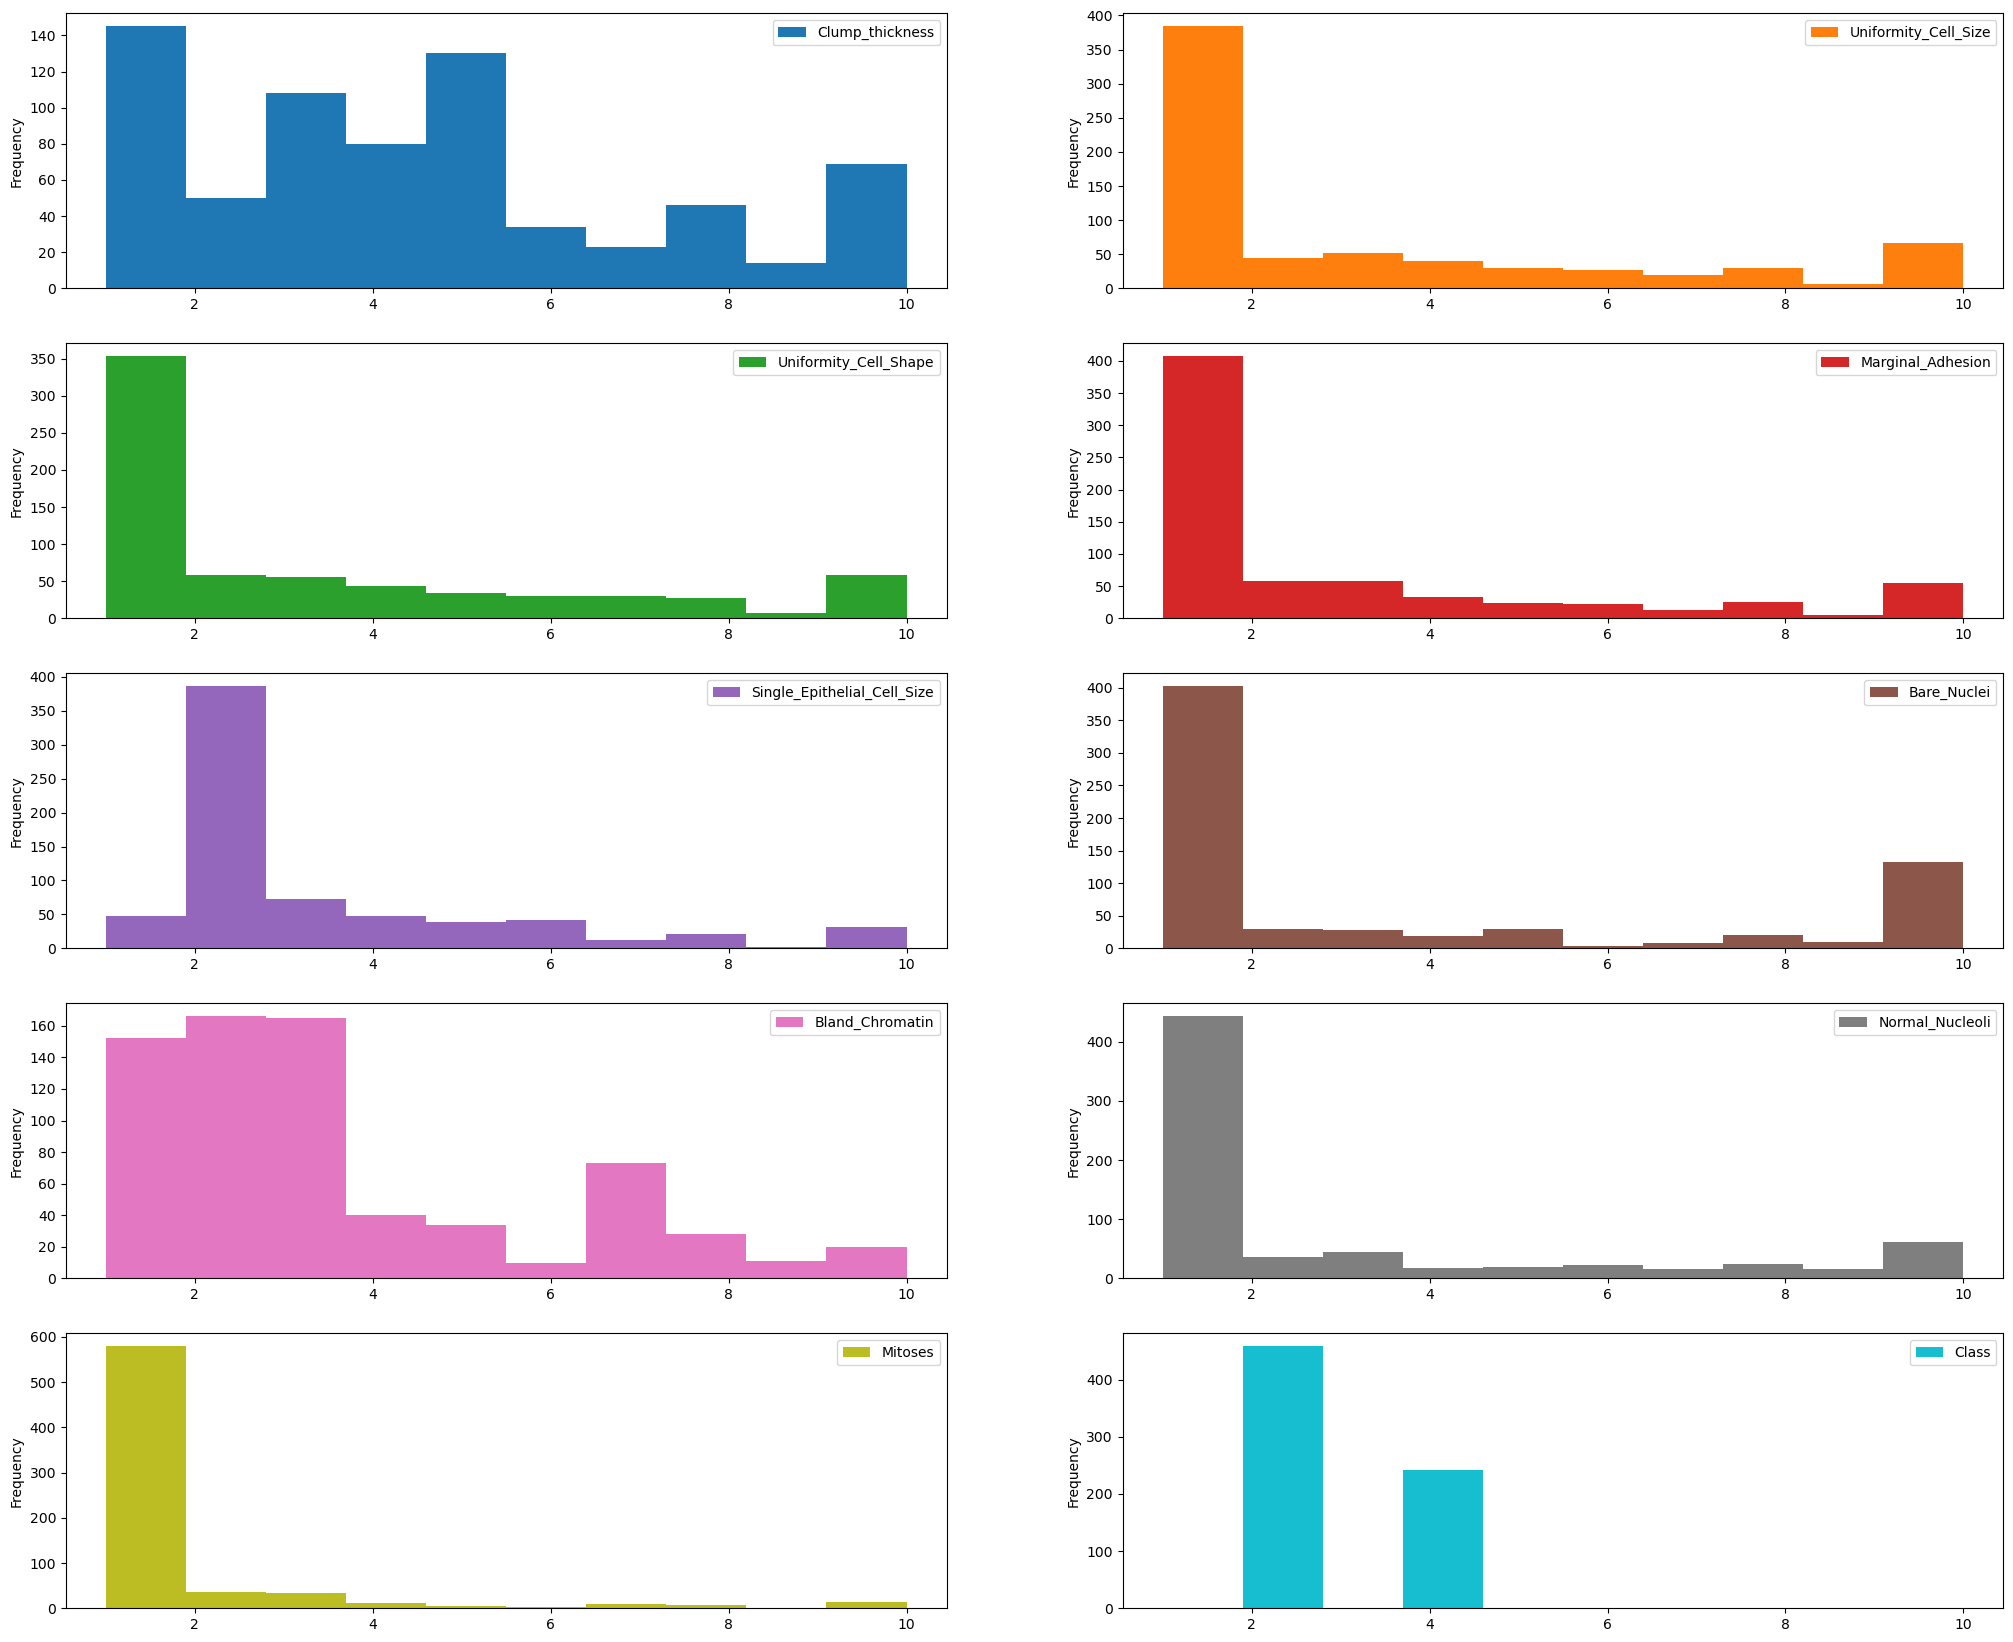

In [66]:
# plot histogram of the variable

plt.rcParams['figure.figsize']=(25,25)
Data.plot(kind='hist', bins=10, subplots=True, layout=(6,2), sharex=False, sharey=False)
plt.show()

We can see the most of variable like (Bare_Nuclei , Mistoses ,..) are positively skewed.

## Estimation Corrlation cofficient
-> We can compute crrelation cofficient (Pearson's r) between pair of attributes.

->The correlation cofficient ranges between -1 and 1.

-> When it between 0 and +1 its meaning the correlation is positive, when it close to +1 it means the correlation is strong positive.

-> When it between 0 and -1 its meaning the correlation is negative, when it close to +1 it means the correlation is strong negative.

-> When it value is 0 its meaning is no correlation between attributes.

In [67]:
Correlation = Data.corr()

In [68]:
Correlation['Class'].sort_values(ascending = False)

Class                          1.000000
Bare_Nuclei                    0.822696
Uniformity_Cell_Shape          0.818934
Uniformity_Cell_Size           0.817904
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

. All attributes is positive correlation ,but some attributes like (Bare_Nuclei ,Uniformity_Cell_Shape, Uniformity_Cell_Size) is strong positive attributes.

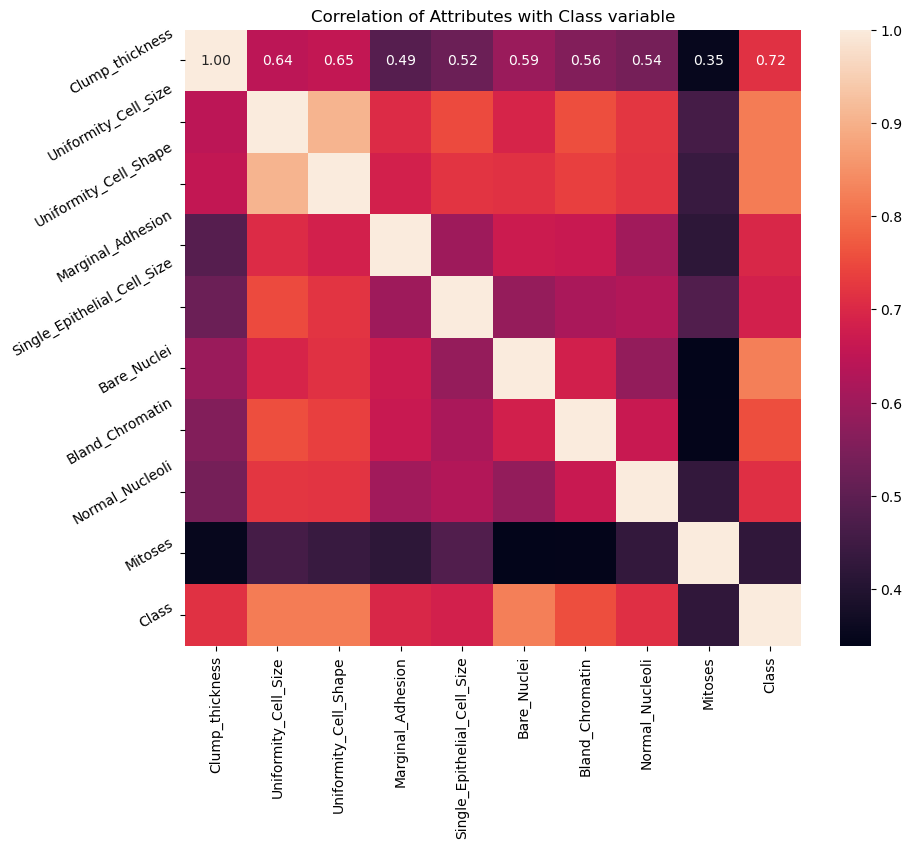

In [70]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(Correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

# 9. Declare feature vector and target variable 

In [72]:
X = Data.drop(['Class'], axis=1)

y = Data['Class']

# 10. Split data into separate training and test set 


In [73]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [74]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((559, 9), (140, 9))

# 11- Featur Enginnering

In [75]:
# check data types in X_train

X_train.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
dtype: object

Engineering missing values in variables


In [76]:
X_train.isna().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    13
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
dtype: int64

In [77]:
X_test.isna().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    3
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.

I will impute missing values with the appropriate statistical measures of the data, in this case median. Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only. This is to avoid overfitting.

In [78]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in X_train.columns:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)   

In [79]:
X_train.isna().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [80]:
X_test.isna().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

Now , Training and testing data is ready for model building. Before that, Let's map all training and testing in same scale.

# 12- Feature Scaling

In [81]:
from sklearn.preprocessing import StandardScaler
cols = X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [83]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,2.028383,0.299506,0.289573,1.119077,-0.546543,1.858357,-0.577774,0.041241,-0.324258
1,1.669451,2.257680,2.304569,-0.622471,3.106879,1.297589,-0.159953,0.041241,-0.324258
2,-1.202005,-0.679581,-0.717925,0.074148,-1.003220,-0.104329,-0.995595,-0.608165,-0.324258
3,-0.125209,-0.026856,-0.046260,-0.622471,-0.546543,-0.665096,-0.159953,0.041241,-0.324258
4,0.233723,-0.353219,-0.382092,-0.274161,-0.546543,-0.665096,-0.577774,-0.283462,-0.324258


In [84]:
X_test.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,-0.125209,-0.679581,-0.382092,-0.622471,-0.546543,-0.665096,-0.995595,-0.608165,-0.324258
1,-0.125209,-0.353219,-0.382092,-0.622471,-0.546543,-0.665096,-0.577774,-0.608165,-0.324258
2,0.592655,0.952231,0.961239,2.164005,1.280168,-0.665096,1.511331,1.664758,-0.324258
3,0.233723,-0.679581,-0.717925,-0.622471,-0.546543,-0.665096,-0.577774,-0.283462,-0.324258
4,1.310519,1.278593,0.625406,2.512315,1.736846,1.577973,0.675689,0.690648,1.494406


# 13. Fit K Neighbours Classifier to the training Set

In [85]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [86]:
y_pred = knn.predict(X_test)

predict_proba method gives the probabilities for the target variable(2 and 4) in this case, in array form.

2 is for probability of benign cancer and 4 is for probability of malignant cancer.



In [87]:
# probability of getting output as 2 - benign cancer

knn.predict_proba(X_test)[:,0]

array([1.        , 1.        , 0.33333333, 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.66666667,
       1.        , 1.        , 0.        , 0.33333333, 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 0.66666667, 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.     

In [88]:
# probability of getting output as 4 - benign cancer

knn.predict_proba(X_test)[:,1]

array([0.        , 0.        , 0.66666667, 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.33333333,
       0.        , 0.        , 1.        , 0.66666667, 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.33333333, 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.     

# 15. Check accuracy score

In [89]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9714


- Here y_test is true class label but y_pred is the prediction from the model.

- Compare between train set and test set accuracy to check the overfitting.

In [91]:
y_pred_train = knn.predict(X_train)
print('Training Set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training Set accuracy score: 0.9821


In [92]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9821
Test set score: 0.9714


The Training score is 0.9821 and Test set score is 0.9714, while the two value is quite comparable. So there is not overfitting.

. The Accuracy 0.9714 is good but let's compare this accuracy with Null Accuracy.

.Null accuracy is the accuracy that could be achieved by always predicting the most frequent class

In [93]:
# check class distribution in test set

y_test.value_counts()

Class
2    85
4    55
Name: count, dtype: int64

In [94]:
# check null accuracy score

null_accuracy = (85/(85+55))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6071


We can see that our model accuracy score is 0.9714 but null accuracy score is 0.6071. So, we can conclude that our K Nearest Neighbors model is doing a very good job in predicting the class labels.

# 16. Rebuild kNN Classification model using different values of k 


I will rebuild the KNN Model by different value of K. I will choose K=5

In [95]:
# instantiate the model with k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)

# fit the model to the training set
knn_5.fit(X_train, y_train)

# predict on the test-set
y_pred_5 = knn_5.predict(X_test)

print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Model accuracy score with k=5 : 0.9714


Rebuild kNN Classification model using k=6


In [102]:
# instantiate the model with k=6
knn_6 = KNeighborsClassifier(n_neighbors=6)

# fit the model to the training set
knn_6.fit(X_train, y_train)

# predict on the test-set
y_pred_6 = knn_6.predict(X_test)

print('Model accuracy score with k=6 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_6)))

Model accuracy score with k=6 : 0.9786


Rebuild kNN Classification model using k=7

In [104]:
# instantiate the model with k=7
knn_7 = KNeighborsClassifier(n_neighbors=7)

# fit the model to the training set
knn_7.fit(X_train, y_train)

# predict on the test-set
y_pred_7 = knn_7.predict(X_test)

print('Model accuracy score with k=7 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

Model accuracy score with k=7 : 0.9786


Rebuild KNN Classification model using K=8

In [105]:
# instantiate the model with k=8
knn_8 = KNeighborsClassifier(n_neighbors=8)

# fit the model to the training set
knn_8.fit(X_train, y_train)

# predict on the test-set
y_pred_8 = knn_8.predict(X_test)

print('Model accuracy score with k=8 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_8)))

Model accuracy score with k=8 : 0.9786


Rebuild KNN Classification model using K=9

In [106]:
# instantiate the model with k=9
knn_9 = KNeighborsClassifier(n_neighbors=9)

# fit the model to the training set
knn_9.fit(X_train, y_train)

# predict on the test-set
y_pred_9 = knn_9.predict(X_test)

print('Model accuracy score with k=9 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_9)))

Model accuracy score with k=9 : 0.9714


.In the original KNN model with k=3 the accuracy is 0.9714. when we increase the value of K to 5, we have the same accuracy.

.When we change the value of k =6,7,8, wet get accuracy score 0.9786. So, it results in performance improvement.

.But when we assign K=9, the score decrease to 0.9714